# Tatanic Competition
## 1. Problem Analysis

## 2. Environment & Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
#test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

train_data = pd.read_csv("./kaggle/input/titanic/train.csv")
test_data = pd.read_csv("./kaggle/input/titanic/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. EDA & Preprocessing

### 3.1 Data Overview

In [3]:
## check for outliers
full = train_data.append(test_data, ignore_index = True)
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [4]:
## check for Na
### Age/Cabin/Embarked/Fare has missing values; Cabin is 75% missing
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## 3.2 check distributions & correlations

Duplicate key in file PosixPath('/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 768 ('font.family  : sans-serif')
Duplicate key in file PosixPath('/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 769 ('font.sans-serif : SimHei, DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file PosixPath('/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 770 ('axes.unicode_minus : False')


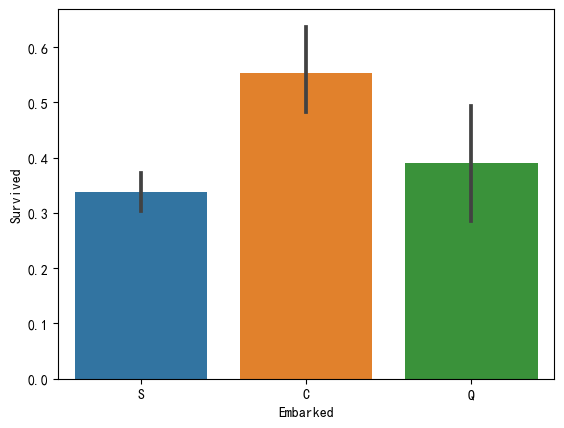

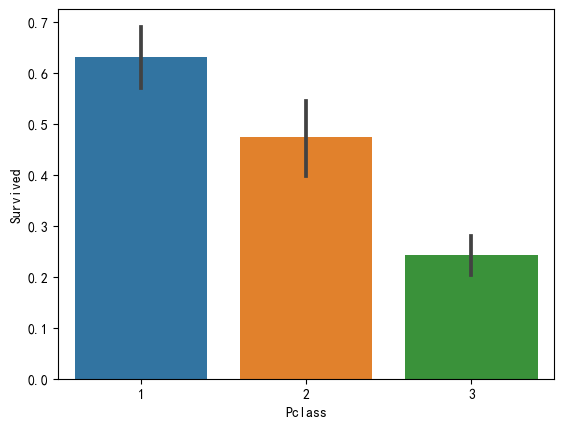

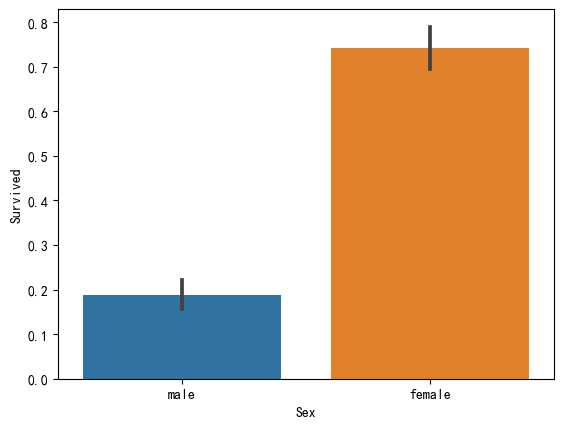

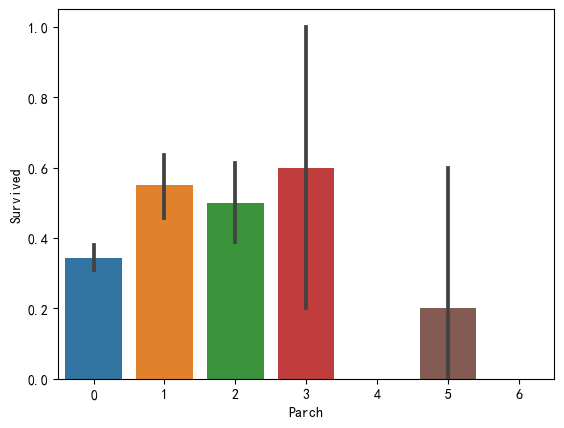

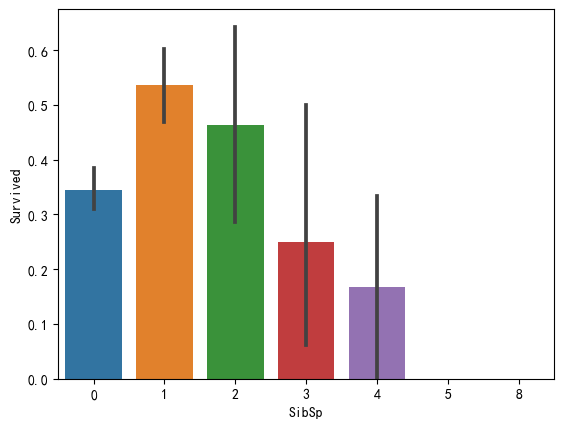

In [5]:


### Discrete variables

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

for x in ['Embarked', 'Pclass','Sex', 'Parch', 'SibSp']:
    plt.figure()
    sns.barplot(data = train_data, x = x, y = 'Survived')

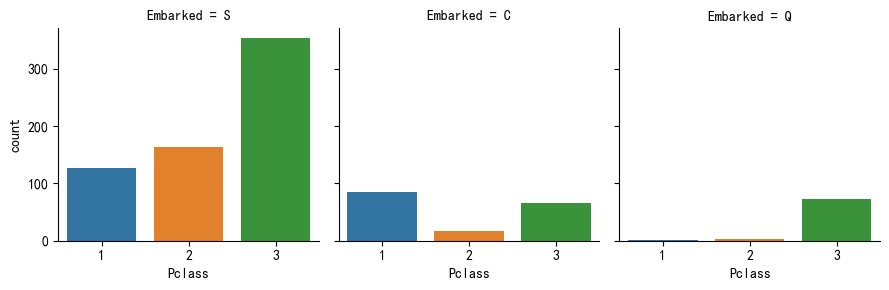

In [6]:
### Dive into Intercorrelations

## Why is France(Cherbourg) has higher survival rate
sns.catplot(x = 'Pclass',col='Embarked',data=train_data, kind = 'count', height = 3)

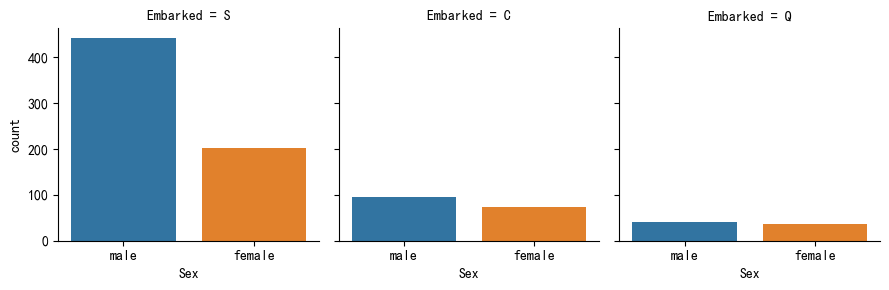

In [7]:
sns.catplot(x = 'Sex',col='Embarked',data=train_data, kind = 'count', height = 3)

/home/tiger/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/tiger/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


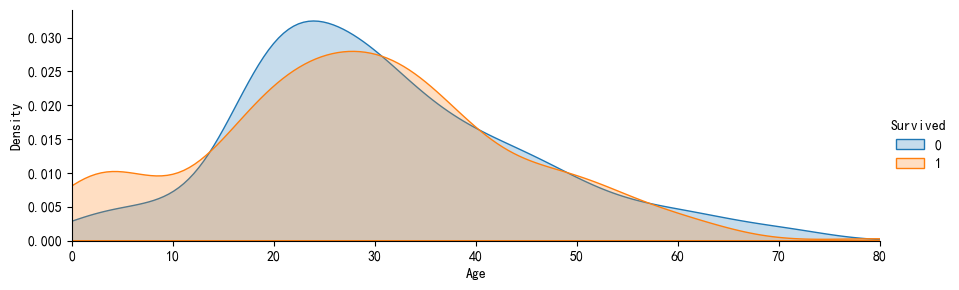

In [8]:
# continuous varible

ageFacet=sns.FacetGrid(train_data,hue='Survived',aspect=3)
#作图，选择图形类型
ageFacet.map(sns.kdeplot,'Age',shade=True)
#其他信息：坐标轴范围、标签等
ageFacet.set(xlim=(0,train_data['Age'].max()))
ageFacet.add_legend()

/home/tiger/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/tiger/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


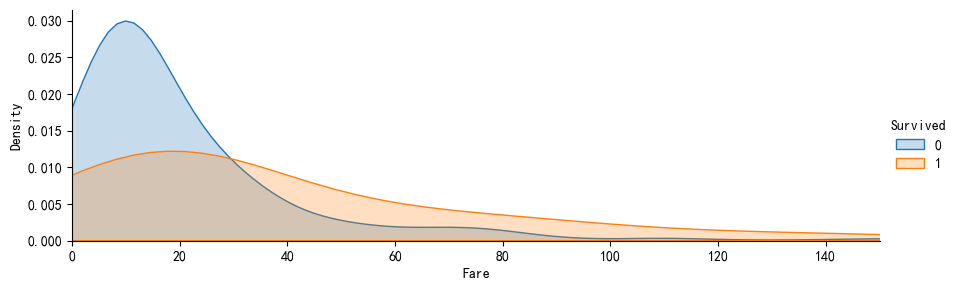

In [9]:
ageFacet=sns.FacetGrid(train_data,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Fare',shade=True)
ageFacet.set(xlim=(0,150))
ageFacet.add_legend()

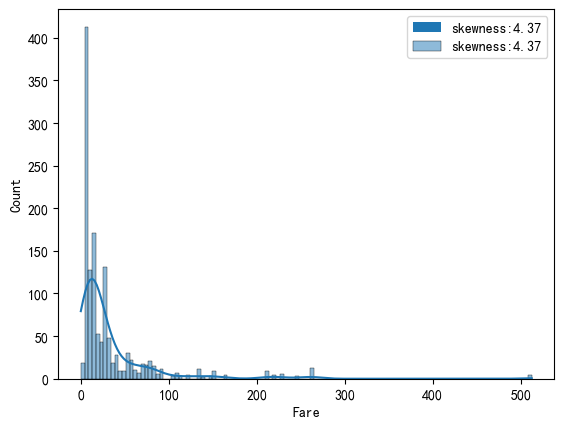

In [10]:
# check distributions

farePlot=sns.histplot(full['Fare'][full['Fare'].notnull()] \
    ,label='skewness:%.2f'%(full['Fare'].skew()), kde = True)
farePlot.legend(loc='best')

### 3.3 Data Preprocessing

#### 3.3.1 Fill NA

In [11]:
# fill in Cabin with a new value
full['Cabin']=full['Cabin'].fillna('U')
full.Cabin.value_counts()

U                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
C22 C26               4
                   ... 
E68                   1
A26                   1
F E57                 1
A9                    1
A16                   1
Name: Cabin, Length: 187, dtype: int64

In [12]:
# fill with most frequent value
full['Embarked']=full['Embarked'].fillna('S')

In [13]:
# check missing value
full[full['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


In [14]:
# fill with other means
full['Fare']=full['Fare'].fillna( \
        full[( \
                full['Pclass']==3)& \
                (full['Embarked']=='S')& \
                (full['Cabin']=='U') \
            ]['Fare'].mean())

In [15]:
### Age - use model to estimate (normally), do it in the next part

### 3.2 Feature Engineering

#### 3.2.1 Extract info by Hand (Text, Count, etc)

In [16]:
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
# check title distribution
full['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Capt              1
Sir               1
Mme               1
Don               1
Lady              1
Dona              1
Jonkheer          1
the Countess      1
Name: Title, dtype: int64

In [17]:
dict = {
    'Mlle' : 'Miss',
    'Jonkheer' : 'Master',
    'Mme' : "Mrs",
    'Ms' : 'Mrs',
    'Don' : 'Royalty',
    'Sir' : 'Royalty',
    'Lady' : 'Royalty',
    'Dona' : 'Royalty',
    'the Countess' : 'Royalty',
    'Capt' : 'Officier',
    'Col' : 'Officier',
    'Major' : 'Officier',
    'Col' : 'Officier',
    'Dr' : 'Officier',
    'Rev' : 'Officier',
}
# full['Title'].replace(dict).value_counts()
full['Title'] = full['Title'].replace(dict)

<AxesSubplot:xlabel='Title', ylabel='Survived'>

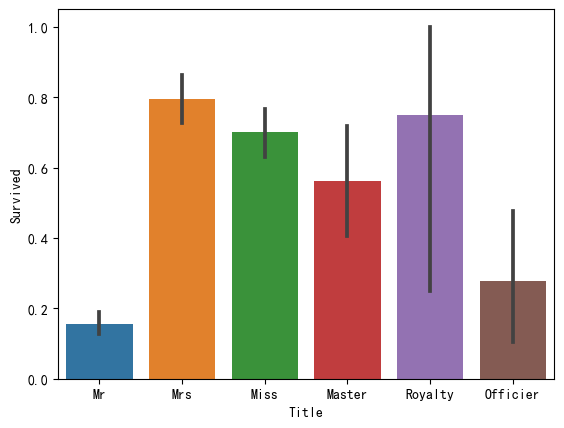

In [18]:
# any information?
sns.barplot(data=full,x='Title',y='Survived')

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

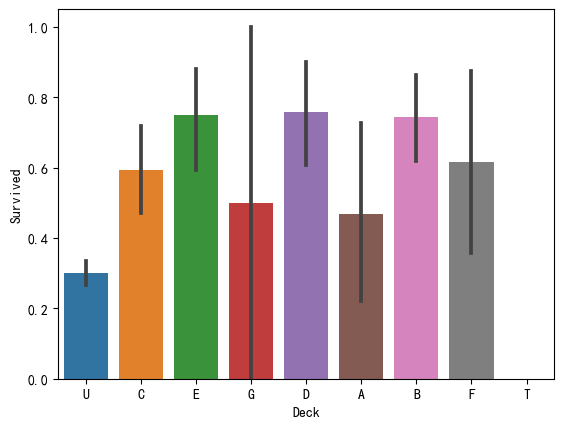

In [19]:
# Cabin to Deck
full['Deck']=full['Cabin'].map(lambda x:x[0])
sns.barplot(data=full,x='Deck',y='Survived')

<AxesSubplot:xlabel='familyNum', ylabel='Survived'>

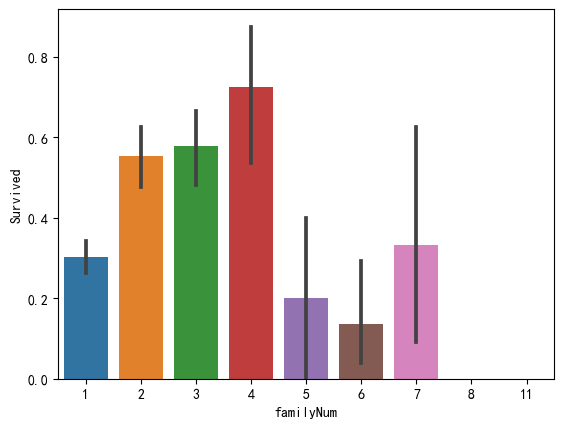

In [20]:
full['familyNum']=full['Parch']+full['SibSp']+1
#查看familyNum与Survived
sns.barplot(data=full,x='familyNum',y='Survived')

In [21]:
def bins1(x):
    if x ==1:
        return 0
    elif ( x >=2)&(x<=4):
        return 1
    else:
        return 2

full['familySize']=full['familyNum'].apply(bins1)
full['familySize'].value_counts()

0    790
1    437
2     82
Name: familySize, dtype: int64

In [22]:
# ticket number
TickCountDict={}
TickCountDict=full['Ticket'].value_counts()
TickCountDict.head()

CA. 2343    11
CA 2144      8
1601         8
3101295      7
PC 17608     7
Name: Ticket, dtype: int64

<AxesSubplot:xlabel='TickCot', ylabel='Survived'>

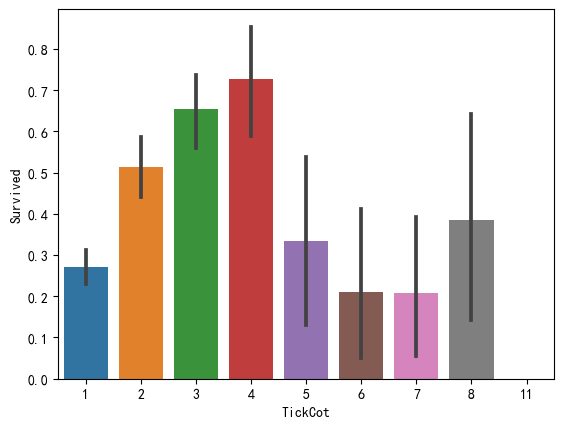

In [23]:
## save number of ppl under ticket number as a feature 
full['TickCot']= full['Ticket'].map(TickCountDict)
full['TickCot'].head()

sns.barplot(data=full,x='TickCot',y='Survived')

<AxesSubplot:xlabel='TickGroup', ylabel='Survived'>

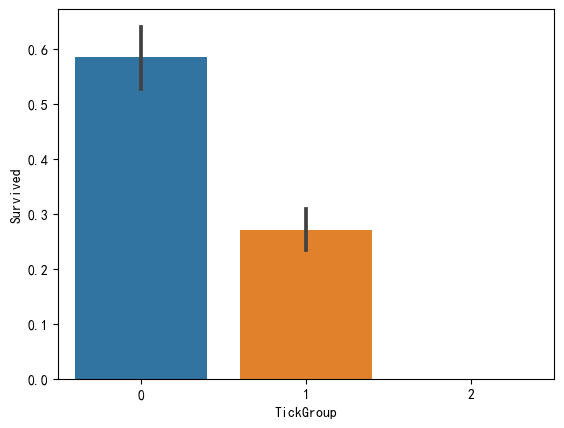

In [24]:
def bins2(num):
    if (num>=2)&(num<=4):
        return 0
    elif (num==1)|((num>=5)&(num<=8)):
        return 1
    else :
        return 2

full['TickGroup']=full['TickCot'].apply(bins2)

sns.barplot(data=full,x='TickGroup',y='Survived')

In [25]:
### Let's Estimate Age Now
## check feature correlation

AgePre=full[['Age','Parch','Pclass','SibSp','Title','familyNum','TickCot']]
# one-hot encoding
AgePre=pd.get_dummies(AgePre)
ParAge=pd.get_dummies(AgePre['Parch'],prefix='Parch')
SibAge=pd.get_dummies(AgePre['SibSp'],prefix='SibSp')
PclAge=pd.get_dummies(AgePre['Pclass'],prefix='Pclass')
# correlation
AgeCorrDf=pd.DataFrame()
AgeCorrDf=AgePre.corr()
AgeCorrDf['Age'].sort_values()

Pclass           -0.408106
Title_Master     -0.385380
Title_Miss       -0.282977
SibSp            -0.243699
familyNum        -0.240229
TickCot          -0.185284
Parch            -0.150917
Title_Royalty     0.057337
Title_Officier    0.166771
Title_Mr          0.183965
Title_Mrs         0.215091
Age               1.000000
Name: Age, dtype: float64

In [26]:
from sklearn.ensemble import RandomForestRegressor
# fill in with random forest
AgeKnown=AgePre[AgePre['Age'].notnull()]
AgeUnKnown=AgePre[AgePre['Age'].isnull()]


AgeKnown_X=AgeKnown.drop(['Age'],axis=1)
AgeKnown_y=AgeKnown['Age']

AgeUnKnown_X=AgeUnKnown.drop(['Age'],axis=1)

#

rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(AgeKnown_X,AgeKnown_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [27]:
rfr.score(AgeKnown_X,AgeKnown_y)

0.58631582329618

In [28]:
# fill in
AgeUnKnown_y = rfr.predict(AgeUnKnown_X)
full.loc[full['Age'].isnull(),['Age']]= AgeUnKnown_y

In [29]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  Deck         1309 non-null   object 
 14  familyNum    1309 non-null   int64  
 15  familySize   1309 non-null   int64  
 16  TickCot      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage:

### 3.2.2 Peer Effect Analysis

Pattern with in certain group of data

In [30]:
### same SurName (with in Gender & Age)
full['Surname']=full['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict={}
SurNameDict=full['Surname'].value_counts()
full['SurnameNum']=full['Surname'].map(SurNameDict)

In [31]:
## Split Male & Woman / Children

MaleDf=full[(full['Sex']=='male')&(full['Age']>12)&(full['familyNum']>=2)]
FemChildDf=full[((full['Sex']=='female')|(full['Age']<=12))&(full['familyNum']>=2)]

In [32]:
MSurNamDf=MaleDf.groupby('Surname').mean()['Survived']
MSurNamDf.value_counts()

0.0    89
1.0    19
0.5     3
Name: Survived, dtype: int64

In [33]:
FCSurNamDf=FemChildDf.groupby('Surname').mean()['Survived']
FCSurNamDf.head()
FCSurNamDf.value_counts()

1.000000    115
0.000000     27
0.750000      2
0.333333      1
0.142857      1
Name: Survived, dtype: int64

In [34]:
# Modify the Data **
## Modify Male with 1 prob to live to woman & chidren
MSurNamDict=MSurNamDf[MSurNamDf.values==1].index
MSurNamDict

Index(['Beane', 'Beckwith', 'Bishop', 'Cardeza', 'Chambers', 'Dick',
       'Duff Gordon', 'Frauenthal', 'Frolicher-Stehli', 'Goldenberg',
       'Greenfield', 'Harder', 'Hoyt', 'Kimball', 'Lindqvist', 'McCoy',
       'Nakid', 'Persson', 'Taylor'],
      dtype='object', name='Surname')

In [35]:
# Modify woman with 0 survival rate
FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index
FCSurNamDict

Index(['Ahlin', 'Arnold-Franchi', 'Barbara', 'Boulos', 'Bourke', 'Caram',
       'Danbom', 'Ford', 'Goodwin', 'Ilmakangas', 'Johnston', 'Jussila',
       'Lahtinen', 'Lefebre', 'Lobb', 'Palsson', 'Panula', 'Rice', 'Robins',
       'Rosblom', 'Sage', 'Skoog', 'Strom', 'Turpin', 'Van Impe',
       'Vander Planke', 'Zabour'],
      dtype='object', name='Surname')

In [36]:
# change male to children & female
replace1 = (full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male')
full.loc[replace1,'Age']=5
full.loc[replace1, 'Sex']='female'

# change woman&chidren to man
replace2 = (full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12))
full.loc[replace2,'Age']=60
full.loc[replace2,'Sex']='male'

In [37]:
(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male')

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

### 3.2.3 Feature Selection

Pclass       -0.338481
TickGroup    -0.319278
Age          -0.059703
SibSp        -0.035322
familyNum     0.016639
TickCot       0.064962
Parch         0.081629
familySize    0.108631
Fare          0.257307
Survived      1.000000
Name: Survived, dtype: float64


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'Survived'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'Fare'),
  Text(3.5, 0, 'Parch'),
  Text(4.5, 0, 'Pclass'),
  Text(5.5, 0, 'SibSp'),
  Text(6.5, 0, 'familyNum'),
  Text(7.5, 0, 'familySize'),
  Text(8.5, 0, 'TickCot'),
  Text(9.5, 0, 'TickGroup')])

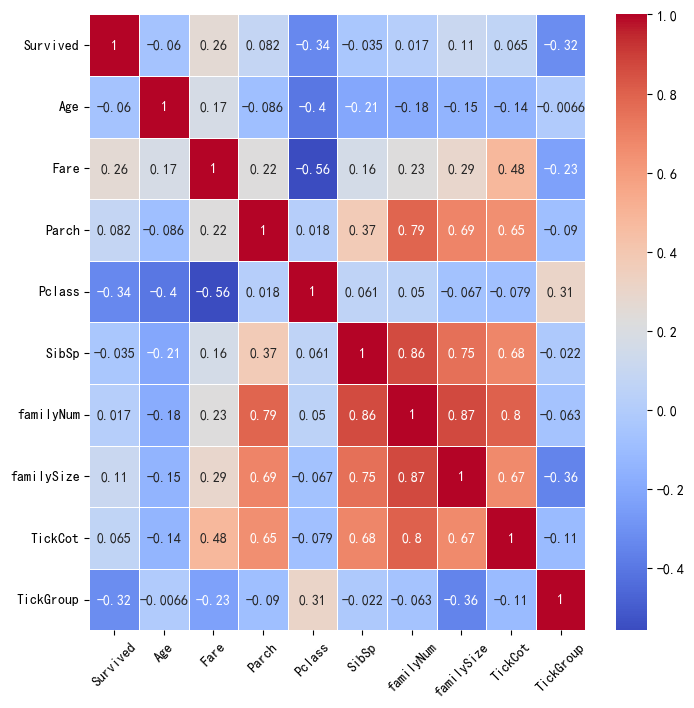

In [38]:
fullSel=full.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)

corrDf=fullSel.corr()
print(corrDf['Survived'].sort_values(ascending=True))
plt.figure(figsize=(8,8))
sns.heatmap(fullSel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','familyNum','familySize','Deck',
                     'TickCot','TickGroup']].corr(),cmap='coolwarm',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)

In [39]:
# drop some of them
fullSel=fullSel.drop(['familyNum','SibSp','TickCot','Parch'],axis=1)
#one-hot encoding
fullSel=pd.get_dummies(fullSel)
PclassDf=pd.get_dummies(full['Pclass'],prefix='Pclass')
TickGroupDf=pd.get_dummies(full['TickGroup'],prefix='TickGroup')
familySizeDf=pd.get_dummies(full['familySize'],prefix='familySize')

fullSel=pd.concat([fullSel,PclassDf,TickGroupDf,familySizeDf],axis=1)


## 4. Model


- SCV
- Decision Tree
- Extra Trees
- Gradient Boosting
- Random Forest
- KNN
- Logistic Regression
- Linear Discriminant Analysis

### Model Training & Model Selection
#### Common Classification Models

In [40]:
# training, validation and testing set
train = fullSel[fullSel['Survived'].notnull()]
test = fullSel[fullSel['Survived'].isnull()]

X = train.drop('Survived',axis=1)
y = train['Survived']
X_test = test.drop('Survived',axis=1)

# import
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

In [41]:
# Create K fold
kfold=StratifiedKFold(n_splits=10)

# compare models
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X, y,
                                      scoring='accuracy',cv=kfold ,n_jobs=-1))

In [42]:
cv_means=[]
cv_std=[]
algos = ['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla',
        'GradientBoostingCla','KNN','LR','LinearDiscrimiAna']
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
# assemble
res =pd.DataFrame({'algorithm': algos, 
                    'cv_mean':cv_means,
                     'cv_std':cv_std,
                     })

res #.style.format({('cv_mean', 'cv_std'):"{:.4%}"})

,algorithm,cv_mean,cv_std
0,SVC,0.675718,0.042975
1,DecisionTreeCla,0.771111,0.049136
2,RandomForestCla,0.816005,0.042298
3,ExtraTreesCla,0.802522,0.037317
4,GradientBoostingCla,0.833945,0.039863
5,KNN,0.731760,0.023811
6,LR,0.832809,0.036182
7,LinearDiscrimiAna,0.826080,0.033532


/home/tiger/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


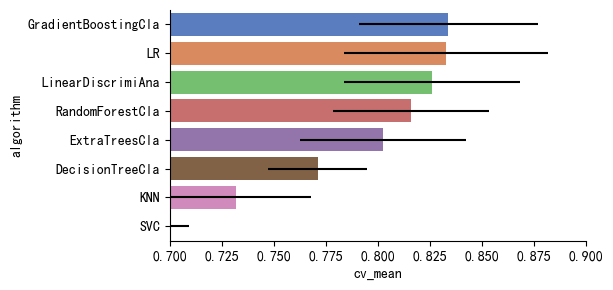

In [43]:
cvResFacet = sns.FacetGrid(res.sort_values(by='cv_mean',ascending=False),
            sharex=False,
            sharey=False, aspect=2 )

cvResFacet.map(sns.barplot,'cv_mean','algorithm', **{'xerr': cv_std},
               palette='muted')

cvResFacet.set(xlim=(0.7,0.9))

cvResFacet.add_legend()

In [44]:
## Compare LR and GBDT further
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
modelgsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsGBC.fit(X,y)

#LogisticRegression
modelLR=LogisticRegression()
LR_param_grid = {'C' : [1,2,3],
                'penalty':['l1','l2']}
modelgsLR = GridSearchCV(modelLR,param_grid = LR_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsLR.fit(X,y)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   14.0s finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

#### Light GBM & XGboost

In [45]:
# use LightGBM and XGBoost
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 

In [46]:
%%capture
lg = lgb.LGBMClassifier(silent=False)

param_dist = {"max_depth": [4,5, 7],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [50, 100, 150]
             }

modelLightGBM = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="roc_auc", verbose=5)
modelLightGBM.fit(X,y)

In [47]:
%%capture
lg = lgb.LGBMClassifier(silent=False)

param_dist = {"max_depth": [4,5, 7],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [50, 100, 150]
             }

modelLightGBM = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="roc_auc", verbose=5)
modelLightGBM.fit(X,y)

In [48]:
%%capture

parameters = {"max_depth": [4,5, 7],
              "learning_rate" : [0.01,0.05,0.1],
              "n_estimators": [50, 100, 150],
               'subsample': [0.6, 1],
             }
'''
parameters = {
              'max_depth': [5, 10, 15, 20, 25],
              'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
              'n_estimators': [500, 1000, 2000, 3000, 5000],
               'min_child_weight': [0, 2, 5, 10, 20],
               'max_delta_step': [0, 0.2, 0.6, 1, 2],
              'subsample': [0.6, 0.8, 0.95],
               'subsample': [0.6, 0.7, 0.8, 0.85, 0.95],
               'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
               'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
               'reg_lambda': [0.2, 0.4, 0.6, 0.8, 1],
               'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]

}
'''

xlf = XGBClassifier(max_depth=10,
			learning_rate=0.01,
			n_estimators=2000,
			silent=True,
			objective='binary:logistic',
			nthread=-1,
			gamma=0,
			min_child_weight=1,
			max_delta_step=0,
			subsample=0.85,
			colsample_bytree=0.7,
			colsample_bylevel=1,
			reg_alpha=0,
			reg_lambda=1,
			scale_pos_weight=1,
			seed=1440,
			missing=1)
			

modelXgboost = GridSearchCV(xlf, param_grid=parameters, scoring='accuracy', cv=3)
modelXgboost.fit(X, y)

### Model Evalutation

In [49]:
print('modelgsGBC score：%.3f'%modelgsGBC.best_score_)
print('modelgsLR score：%.3f'%modelgsLR.best_score_)
print('modelLightGBM score：%.3f'%modelLightGBM.best_score_)
print('modelXgboost score：%.3f'%modelXgboost.best_score_)

modelgsGBC score：0.842
modelgsLR score：0.834
modelLightGBM score：0.876
modelXgboost score：0.837


In [50]:
y_predicted_gbdt = modelgsGBC.predict(X).astype(int)
y_predicted_lr = modelgsLR.predict(X).astype(int)
y_predicted_lightgbm = modelXgboost.predict(X).astype(int)
y_predicted_xgboost = modelLightGBM.predict(X).astype(int)

<Figure size 640x480 with 0 Axes>

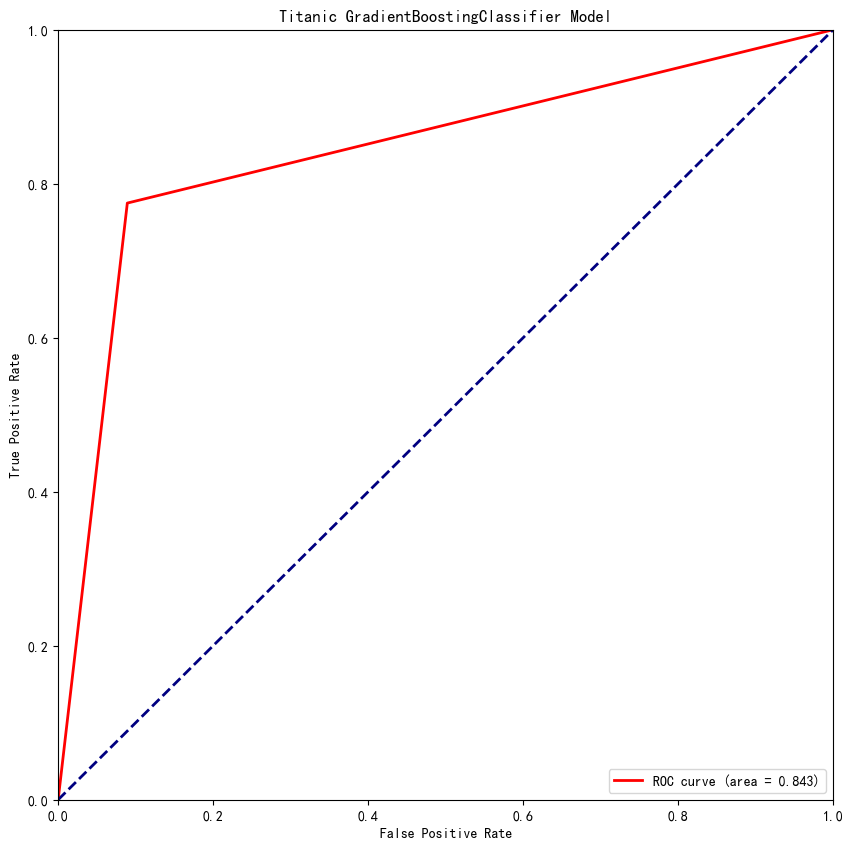

In [51]:
from sklearn.metrics import roc_curve, auc 
# plot AUC Curve to one of the models

# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y, y_predicted_gbdt) 
roc_auc = auc(fpr,tpr) 

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic GradientBoostingClassifier Model')
plt.legend(loc="lower right")
plt.show()

<Figure size 640x480 with 0 Axes>

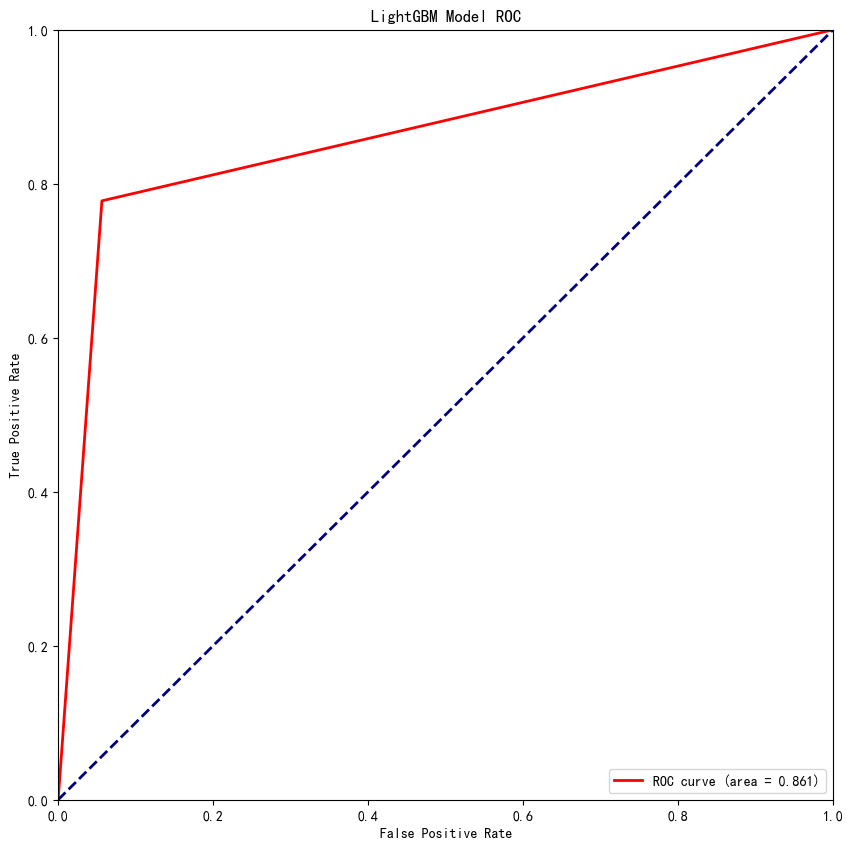

In [55]:



# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y, y_predicted_lightgbm) 
roc_auc = auc(fpr,tpr) 

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM Model ROC')
plt.legend(loc="lower right")
plt.show()

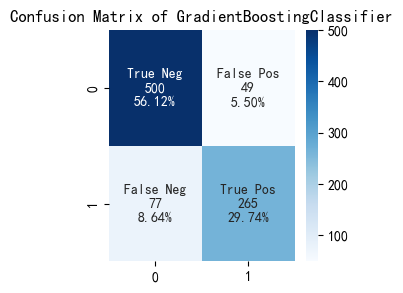

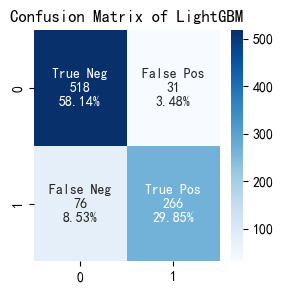

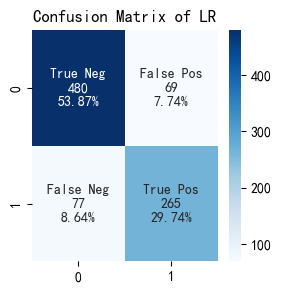

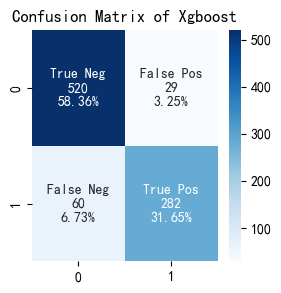

In [69]:
from sklearn.metrics import confusion_matrix

def plot_cf(cf_matrix, name = ''):
    # names
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    # labels
    plt.figure(figsize=(3,3))
    sns.heatmap(cf_matrix, annot=labels, fmt = '', cmap='Blues')
    plt.title(f'Confusion Matrix of {name}')
    

cf_matrix = confusion_matrix(y,y_predicted_gbdt)
plot_cf(cf_matrix, 'GradientBoostingClassifier')


cf_matrix = confusion_matrix(y,y_predicted_lightgbm)
plot_cf(cf_matrix, 'LightGBM')


cf_matrix = confusion_matrix(y,y_predicted_lr)
plot_cf(cf_matrix, 'LR')

cf_matrix = confusion_matrix(y,y_predicted_xgboost)
plot_cf(cf_matrix, 'Xgboost')

## 5. Prediction & Output

In [76]:
predictions = modelLightGBM.predict(X_test)
predictions = predictions.astype(int)


output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission-lgb.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
